# 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기

In [2]:
data=pd.read_csv("datasets_121_280_Pokemon.csv")
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# 데이터 파악하기

In [3]:
print("shape of data:",data.shape)
print("type of data:",type(data))

shape of data: (800, 13)
type of data: <class 'pandas.core.frame.DataFrame'>


In [4]:
data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


# 1. 속성에 따른 능력치(HP,Attack,Defense,Sp. Atk,Sp. Def) 비교

In [56]:
#타입종류찾기(중복모두제거하면 타입이 각각하나씩만 남는다.)
Type_1=data['Type 1']
Type_2=data['Type 2']
Type=pd.concat([Type_1,Type_2], axis=0)
Type=Type.dropna()
uniType=[]
for v in Type:
    if v not in uniType:
        uniType.append(v)
pd.DataFrame(uniType)
print(uniType)

['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric', 'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice', 'Dragon', 'Dark', 'Steel', 'Flying']


In [108]:
#각 타입별 데이터프레임만들기
Grass=pd.DataFrame()
Fire=pd.DataFrame()
Water=pd.DataFrame()
Bug=pd.DataFrame()
Normal=pd.DataFrame()
Poison=pd.DataFrame()
Electric=pd.DataFrame()
Ground=pd.DataFrame()
Fairy=pd.DataFrame()
Fighting=pd.DataFrame()
Psychic=pd.DataFrame()
Rock=pd.DataFrame()
Ghost=pd.DataFrame()
Ice=pd.DataFrame()
Dragon=pd.DataFrame()
Dark=pd.DataFrame()
Steel=pd.DataFrame()
Flying=pd.DataFrame()
TT=[Grass,Fire,Water,Bug,Normal,Poison,Electric,Ground,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying]
Type_name=["Grass","Fire","Water","Bug","Normal","Poison","Electric","Ground","Fairy","Fighting"
           ,"Psychic","Rock","Ghost","Ice","Dragon","Dark","Steel","Flying"]

In [58]:
#타입별로 분류
for a in range(0,len(TT),1):
    for i in range(0,len(data),1):
        if data['Type 1'][i]==uniType[a] or data['Type 2'][i]==uniType[a]:
                TT[a]=TT[a].append(pd.DataFrame(data.loc[i]).T)                     

In [59]:
#타입별 특성을 평균
Total=pd.DataFrame()
for u in range(0,18,1):
    A= {'Type':Type_name[u],'HP':TT[u]['HP'].mean(), 'Attack':TT[u]['Attack'].mean(),'Sp_Atk':TT[u]['Sp. Atk']
        .mean(),'Defense':TT[u]['Defense'].mean(),'Sp_Def':TT[u]['Sp. Def'].mean()}
    A_=pd.DataFrame([A])
    Total=Total.append(A_)
Total.head()

,Type,HP,Attack,Sp_Atk,Defense,Sp_Def
0,Grass,66.052632,73.463158,72.936842,73.252632,71.505263
0,Fire,70.156250,84.109375,93.000000,70.093750,74.328125
0,Water,71.023810,73.706349,74.777778,74.293651,70.309524
0,Bug,56.736111,71.763889,53.569444,71.111111,64.666667
0,Normal,76.735294,72.656863,57.078431,59.607843,63.745098


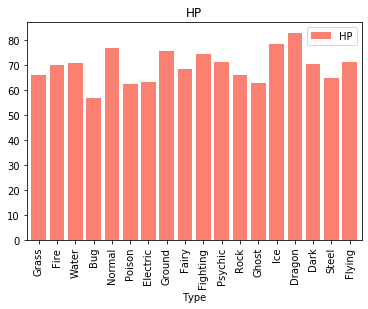

In [60]:
#체력
Total.plot.bar(x='Type', y=['HP'],width=0.8,color='salmon',title="HP")

Dragon 타입과 Ice 타입의 체력이 각각 1,2등으로 높고\
Bug 타입과 Poison,Ghost타입이 각각 1,2등으로 낮은것을 볼 수 있습니다.

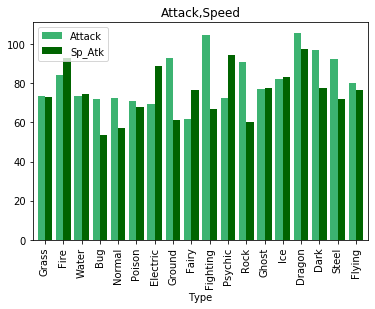

In [61]:
Total.plot.bar(x='Type', y=['Attack','Sp_Atk'],width=0.8,color=['mediumseagreen','darkgreen'],title="Attack,Speed")

Dragon타입과 fighting 타입이 공격력이 각각 1,2등으로 높고,\
Fairy타입과 Electric타입이 공격력이 각각 1,2등으로 낮다.\
Dragon타입과 Fire타입이 공격속도가 각각 1,2등으로 높고,\
Bug타입과 Normal타입이 공격속도가 각각 1,2등으로 낮다.

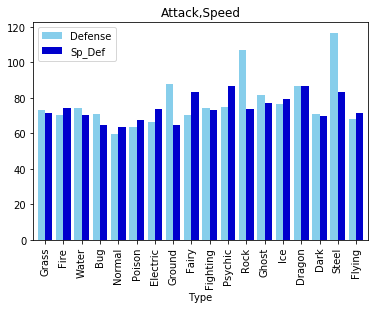

In [62]:
Total.plot.bar(x='Type', y=['Defense','Sp_Def'],width=0.8,color=['skyblue','mediumblue'],title="Attack,Speed")

Steel타입과 Rock 타입이 방어력이 각각 1,2등으로 높고,\
Normal타입과 Poison타입이 방어력이 각각 1,2등으로 낮다.\
Psychic타입과 Dragon타입이 방어속도가 각각 1,2등으로 높고,\
Normal타입과 Fairy타입이 방어속도가 각각 1,2등으로 낮다.

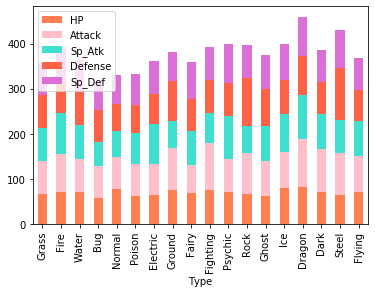

In [63]:
#누적그래프
Total.plot.bar(x='Type',stacked=True,color=['coral','pink','turquoise','Tomato','orchid'])

# 2. 어떤 타입의 전설이 가장 많을까

In [64]:
#전설타입의 행만 골라 데이터프레임 생성
no_Leg=pd.DataFrame(data=np.arange(0).reshape(0,13),columns=['#','Name','Type 1','Type 2','Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation','Legendary'])
Leg=pd.DataFrame(data=np.arange(0).reshape(0,13),columns=['#','Name','Type 1','Type 2','Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation','Legendary'])
for i in range(0,len(data),1):
    if data['Legendary'][i]==True:
        Leg=Leg.append(data.iloc[i])
    else:
        no_Leg=no_Leg.append(data.iloc[i])
Leg=Leg[1:]
no_Leg=no_Leg[1:]

In [65]:
#전설포켓몬의 타입만 추출
Leg_type1=Leg['Type 1']
Leg_type2=Leg['Type 2']
Leg_type=pd.DataFrame
Leg_type=pd.concat([Leg_type1,Leg_type2])
Leg_type.dropna()
Leg_type

157    Electric
158        Fire
162     Psychic
163     Psychic
164     Psychic
         ...   
795       Fairy
796       Fairy
797       Ghost
798        Dark
799       Water
Length: 128, dtype: object

In [110]:
df=pd.DataFrame(data=np.arange(18).reshape(1,18),columns=['Grass','Fire','Water',
'Bug','Normal','Poison','Electric','Ground','Fairy','Fighting','Psychic','Rock',
'Ghost','Ice','Dragon','Dark','Steel','Flying'],index=['fre'],dtype='int')
df.iloc[0]=0
df

,Grass,Fire,Water,Bug,Normal,Poison,Electric,Ground,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying
fre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
for i in range(0,len(Leg_type),1):
    if Leg_type.iloc[i]=="Grass":
        df['Grass']+=1
    elif Leg_type.iloc[i]=="Fire":
        df['Fire']+=1
    elif Leg_type.iloc[i]=="Water":
        df['Water']+=1  
    elif Leg_type.iloc[i]=="Bug":
        df['Bug']+=1  
    elif Leg_type.iloc[i]=="Normal":
        df['Normal']+=1  
    elif Leg_type.iloc[i]=="Poison":
        df['Poison']+=1  
    elif Leg_type.iloc[i]=="Electric":
        df['Electric']+=1
    elif Leg_type.iloc[i]=="Ground":
        df['Ground']+=1
    elif Leg_type.iloc[i]=="Fairy":
        df['Fairy']+=1
    elif Leg_type.iloc[i]=="Fighting":
        df['Fighting']+=1
    elif Leg_type.iloc[i]=="Psychic":
        df['Psychic']+=1
    elif Leg_type.iloc[i]=="Rock":
        df['Rock']+=1
    elif Leg_type.iloc[i]=="Ghost":
        df['Ghost']+=1
    elif Leg_type.iloc[i]=="Ice":
        df['Ice']+=1
    elif Leg_type.iloc[i]=="Dragon":
        df['Dragon']+=1
    elif Leg_type.iloc[i]=="Dark":
        df['Dark']+=1
    elif Leg_type.iloc[i]=="Steel":
        df['Steel']+=1
    elif Leg_type.iloc[i]=="Flying":
        df['Flying']+=1

In [112]:
df

,Grass,Fire,Water,Bug,Normal,Poison,Electric,Ground,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying
fre,3,8,5,0,2,0,5,5,3,4,19,4,3,4,16,3,5,14


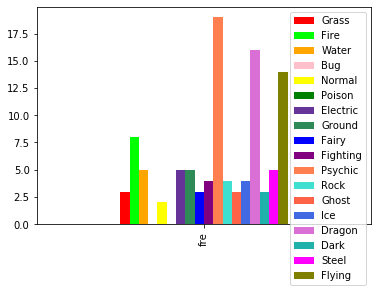

In [68]:
df.plot.bar(color=['red','lime','orange','pink','yellow','green','rebeccapurple','seagreen','blue','purple','coral','turquoise','Tomato','royalblue','orchid','lightseagreen','magenta','olive'])

# 3. 전설(Legendary=T) vs 일반(Legendary=F) 능력치 비교

In [69]:
no_Leg.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,0


In [70]:
#전설&일반 포켓몬의 능력치의 평균구하기
Legend=pd.DataFrame(data=np.arange(12).reshape(2,6),index=['not Legendary','Legendary'],columns=['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed'])
Legend

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
not Legendary,0,1,2,3,4,5
Legendary,6,7,8,9,10,11


In [71]:
#평균값을 데이터 프레임에 넣기
for i in range(0,6,1):
    Legend.iloc[0,i]=no_Leg.iloc[:,i+5].mean()
    Legend.iloc[1,i]=Leg.iloc[:,i+5].mean()

In [113]:
Legend

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
not Legendary,67.212534,75.705722,71.589918,68.459128,68.897820,65.483651
Legendary,92.781250,117.171875,99.656250,122.609375,105.640625,100.421875


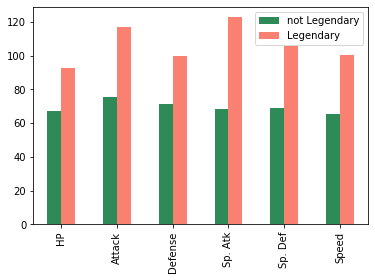

In [72]:
#시각화
Legend.T.plot.bar(color=['seagreen','salmon'])

# 4. 세대별(Generation) 능력치 비교

In [73]:
#각 세대별 dataframe생성
first=pd.DataFrame(data=np.arange(0).reshape(0,13),columns=['#','Name','Type 1','Type 2','Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation','Legendary'])
second=pd.DataFrame(data=np.arange(0).reshape(0,13),columns=['#','Name','Type 1','Type 2','Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation','Legendary'])
third=pd.DataFrame(data=np.arange(0).reshape(0,13),columns=['#','Name','Type 1','Type 2','Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation','Legendary'])
fourth=pd.DataFrame(data=np.arange(0).reshape(0,13),columns=['#','Name','Type 1','Type 2','Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation','Legendary'])
fifth=pd.DataFrame(data=np.arange(0).reshape(0,13),columns=['#','Name','Type 1','Type 2','Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation','Legendary'])
sixth=pd.DataFrame(data=np.arange(0).reshape(0,13),columns=['#','Name','Type 1','Type 2','Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation','Legendary'])

for i in range(0,len(data),1):
    if data.iloc[i,11]==1:
        first=first.append(data.iloc[i])
    elif data.iloc[i,11]==2:
        second=second.append(data.iloc[i])
    elif data.iloc[i,11]==3:
        third=third.append(data.iloc[i])
    elif data.iloc[i,11]==4:
        fourth=fourth.append(data.iloc[i])
    elif data.iloc[i,11]==5:
        fifth=fifth.append(data.iloc[i])
    elif data.iloc[i,11]==6:
        sixth=sixth.append(data.iloc[i])

In [77]:
Generation=pd.DataFrame(data=np.arange(36).reshape(6,6),index=['first','second','third','fourth','fifth','sixth'],columns=['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed'])
Generation

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
first,0,1,2,3,4,5
second,6,7,8,9,10,11
third,12,13,14,15,16,17
fourth,18,19,20,21,22,23
fifth,24,25,26,27,28,29
sixth,30,31,32,33,34,35


In [80]:
for i in range(0,len(Generation),1):
    Generation.iloc[0,i]=first.iloc[:,i+5].mean()
    Generation.iloc[1,i]=second.iloc[:,i+5].mean()
    Generation.iloc[2,i]=third.iloc[:,i+5].mean()
    Generation.iloc[3,i]=fourth.iloc[:,i+5].mean()
    Generation.iloc[4,i]=fifth.iloc[:,i+5].mean()
    Generation.iloc[5,i]=sixth.iloc[:,i+5].mean()

In [81]:
Generation

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
first,65.819277,76.638554,70.861446,71.819277,69.090361,72.584337
second,71.207547,72.028302,73.386792,65.943396,73.905660,61.811321
third,66.543750,81.625000,74.100000,75.806250,71.225000,66.925000
fourth,73.082645,82.867769,78.132231,76.404959,77.190083,71.338843
fifth,71.787879,82.066667,72.327273,71.987879,68.739394,68.078788
sixth,68.268293,75.804878,76.682927,74.292683,74.890244,66.439024


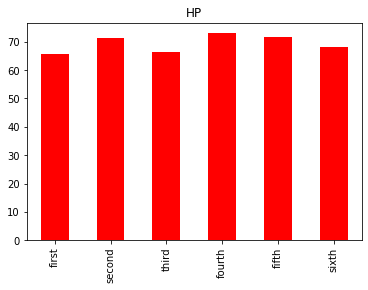

In [98]:
Generation['HP'].plot.bar(title="HP",color='red')

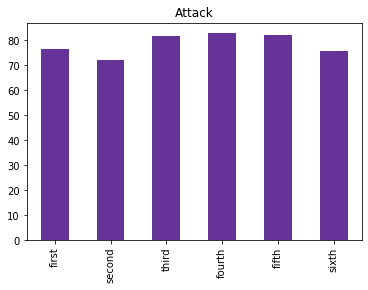

In [100]:
Generation['Attack'].plot.bar(title="Attack",color='rebeccapurple')

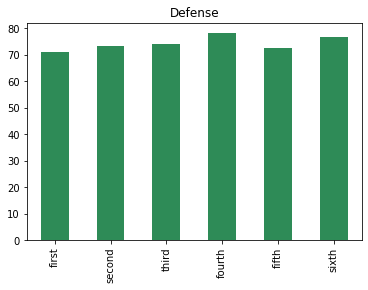

In [101]:
Generation['Defense'].plot.bar(title="Defense",color='seagreen')

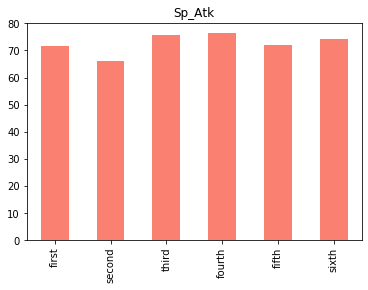

In [104]:
Generation['Sp. Atk'].plot.bar(title="Sp_Atk",color='salmon')

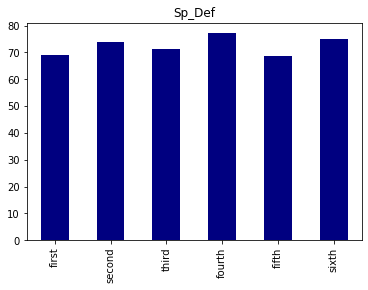

In [105]:
Generation['Sp. Def'].plot.bar(title="Sp_Def",color='navy')

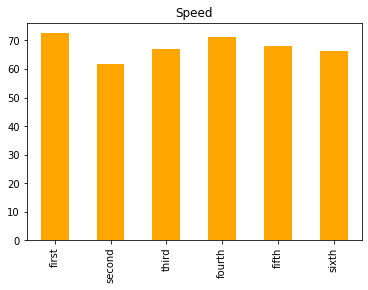

In [107]:
Generation['Speed'].plot.bar(title="Speed",color='orange')